In [1]:
import pandas as pd

# Cargar los datos desde un archivo CSV
df = pd.read_csv("car-dataset/Car details v4.csv")


In [2]:
# Seleccionar características y variable objetivo
desired_columns = ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
                    'Transmission', 'Color', 'Owner', 'Seller Type', 'Engine',
                    'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
                    'Fuel Tank Capacity']
# Remove rows with missing values before encoding
df.dropna(subset=desired_columns, inplace=True)

X = df[desired_columns]
y = df['Price']

# Codificar características categóricas
X_encoded = pd.get_dummies(X)


In [3]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar un modelo de regresión (por ejemplo, un modelo de bosque aleatorio)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el rendimiento del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Calcular el coeficiente de determinación (R^2)
r2_rf = r2_score(y_test, y_pred)
print("El coeficiente de determinación (R^2) del modelo es:", r2_rf)


Error cuadrático medio: 1200268812130.8923
El coeficiente de determinación (R^2) del modelo es: 0.8974706856006702


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar un modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo de regresión lineal
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Error cuadrático medio (Linear Regression):", mse_lr)
print("El coeficiente de determinación (R^2) del modelo (Linear Regression) es:", r2_lr)


Error cuadrático medio (Linear Regression): 1.9377403327747177e-18
El coeficiente de determinación (R^2) del modelo (Linear Regression) es: 1.0


In [12]:
from sklearn.neighbors import KNeighborsRegressor

# Entrenar un modelo de vecinos más cercanos (KNeighborsRegressor)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo de vecinos más cercanos
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Error cuadrático medio (KNeighborsRegressor):", mse_knn)
print("El coeficiente de determinación (R^2) del modelo (KNeighborsRegressor) es:", r2_knn)


Error cuadrático medio (KNeighborsRegressor): 903684088298.716
El coeficiente de determinación (R^2) del modelo (KNeighborsRegressor) es: 0.9228055340017061


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


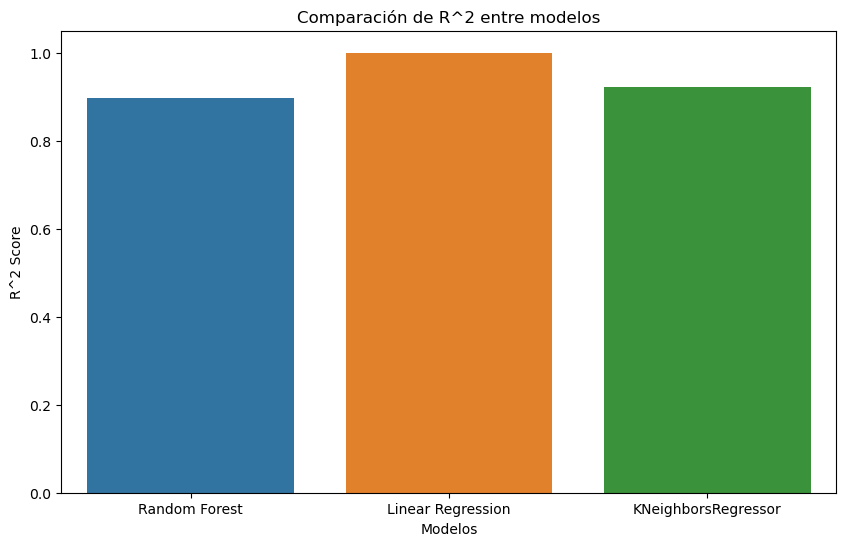

In [15]:
import matplotlib.pyplot as plt

# Gráfica de comparación de los coeficientes de determinación (R^2)
models = ['Random Forest', 'Linear Regression', 'KNeighborsRegressor']
r2_scores = [r2_rf, r2_lr, r2_knn]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.xlabel('Modelos')
plt.ylabel('R^2 Score')
plt.title('Comparación de R^2 entre modelos')
plt.show()


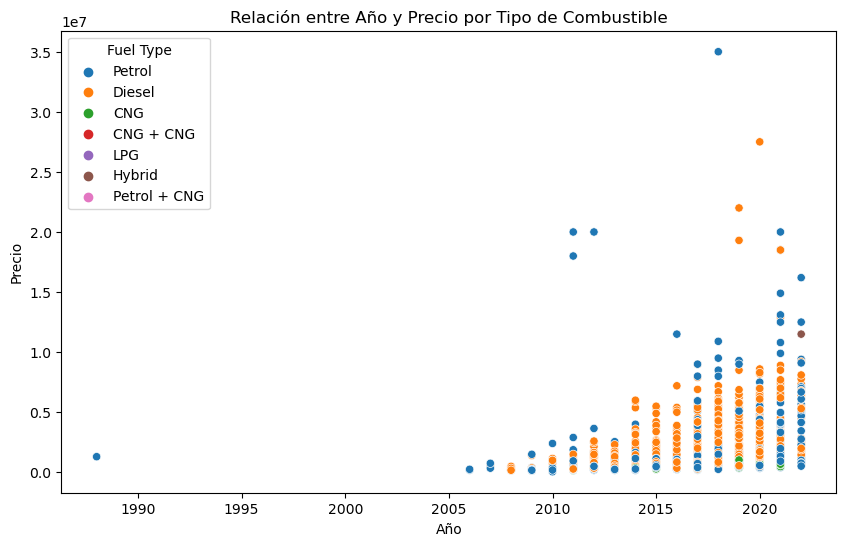

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la relación entre las características y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year'], y=df['Price'], hue=df['Fuel Type'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Relación entre Año y Precio por Tipo de Combustible')
plt.show()

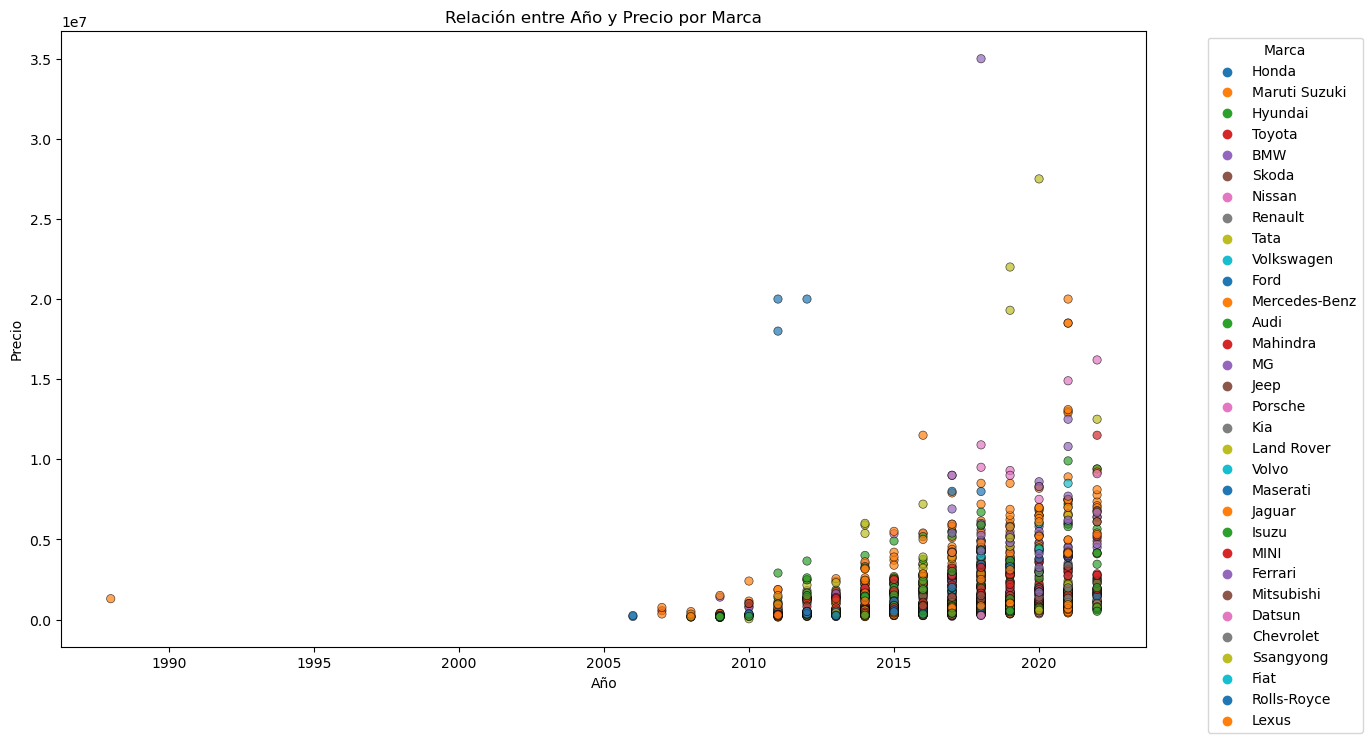

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la relación entre la marca, el precio y el año
plt.figure(figsize=(14, 8))  # Tamaño de la figura ajustado para mayor claridad
sns.scatterplot(x=df['Year'], y=df['Price'], hue=df['Make'], palette='tab10', alpha=0.7, edgecolor='k')

plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Relación entre Año y Precio por Marca')
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico
plt.show()


In [30]:
nuevo_coche = pd.DataFrame({
    "Year": [2017],
    "Kilometer": [56000],
    "Fuel Type": ["Petrol"],
    "Transmission": ["Automatic"],
    "Owner": ["First"],
    "Make": ["Skoda"],
    "Model": ["Octavia 1.8 TSI Style Plus AT [2017]"],
    "Color": ["White"],
    "Seller Type": ["Individual"],
    "Engine": ["1798 cc"],
    "Drivetrain": ["FWD"]
})

# Codificar el nuevo coche utilizando la misma codificación que se usó en el conjunto de datos de entrenamiento
nuevo_coche_encoded = pd.get_dummies(nuevo_coche)

# Asegurarse de que el conjunto de datos del nuevo coche tenga las mismas columnas y en el mismo orden que el conjunto de datos de entrenamiento
nuevo_coche_encoded = nuevo_coche_encoded.reindex(columns=X_train.columns, fill_value=0)

# Realizar la predicción del precio del nuevo coche
precio_predicho = model.predict(nuevo_coche_encoded) * 0.011
print("Precio predicho para el nuevo coche:", precio_predicho[0])

Precio predicho para el nuevo coche: 1273.03
